In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f79b7b8>,
      dtype=object)

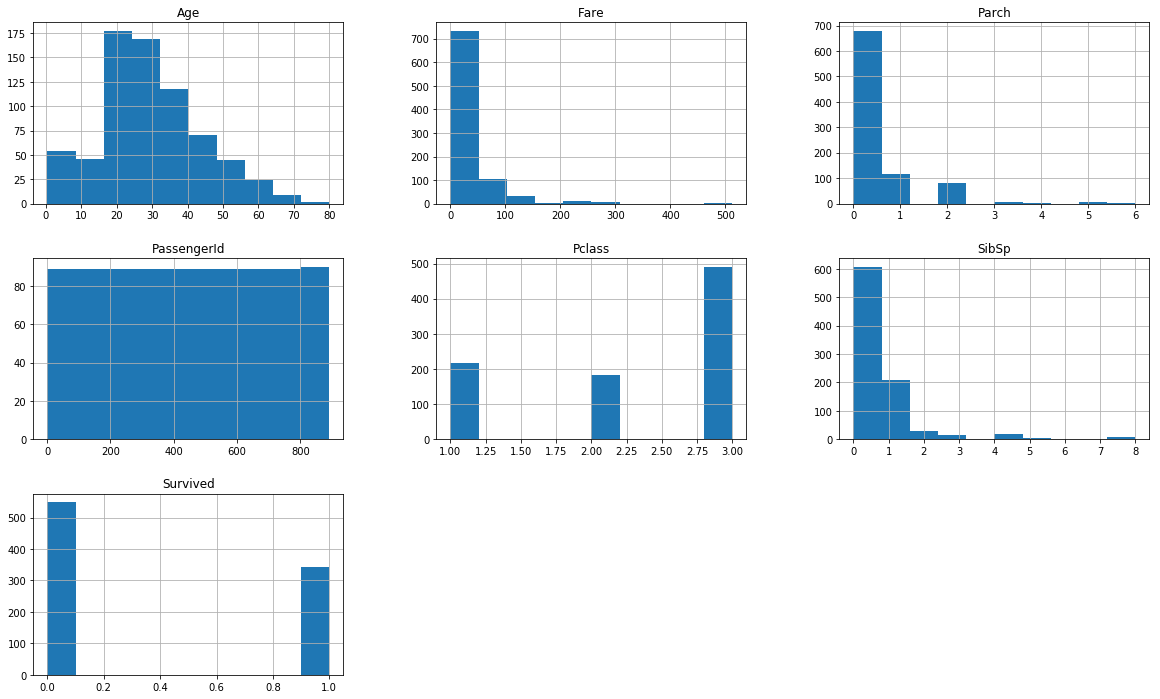

In [7]:
train_data.hist(figsize=(20,12))

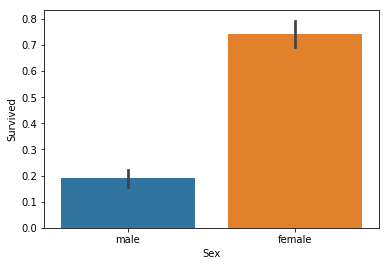

In [8]:
sns.barplot(y="Survived",x="Sex",data=train_data)

In [9]:
female=train_data.groupby(["Sex"]).Survived.sum()[0]
print("Percentage of male suvived are : {:0.3f}%".format(100*female/train_data.groupby(["Sex"]).Survived.count()[0]))
male=train_data.groupby(["Sex"]).Survived.sum()[1]
print("Percentage of male suvived are : {:0.3f}%".format(100*male/train_data.groupby(["Sex"]).Survived.count()[1]))

Percentage of male suvived are : 74.204%
Percentage of male suvived are : 18.891%


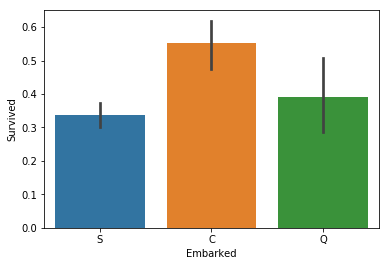

In [10]:
sns.barplot(y="Survived",x="Embarked",data=train_data)

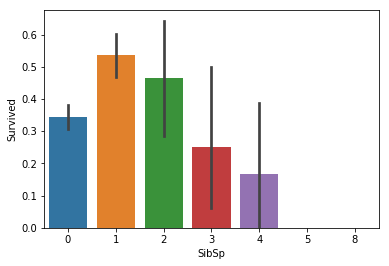

In [11]:
sns.barplot(y="Survived",x="SibSp",data=train_data)

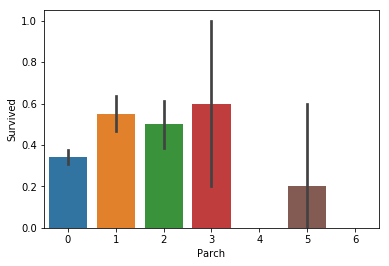

In [12]:
sns.barplot(y="Survived",x="Parch",data=train_data)

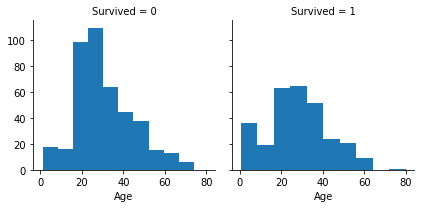

In [13]:
p=sns.FacetGrid(col="Survived",data=train_data)
p.map(plt.hist,"Age")

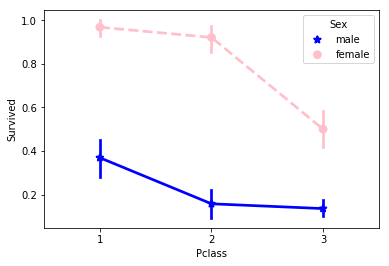

In [14]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_data,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

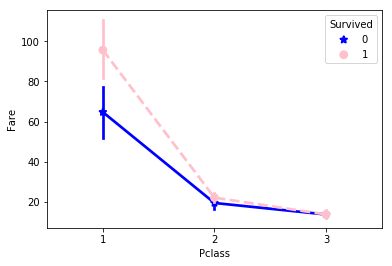

In [15]:
sns.pointplot(x="Pclass", y="Fare", hue="Survived", data=train_data,
              palette={0: "blue", 1: "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

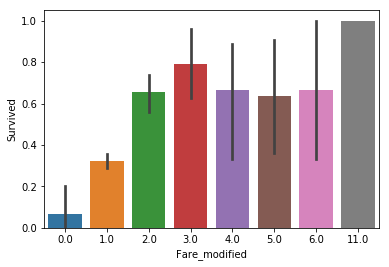

In [16]:
train_data["Fare_modified"]=np.ceil(train_data["Fare"] / 50)
sns.barplot(y="Survived",x="Fare_modified",data=train_data)

## Retain the original data
### Removing "modified_fare"

In [17]:
train_data.drop("Fare_modified",axis=1,inplace=True)

In [18]:
test_data["Survived"]=(test_data.Sex=="female").astype(int)
test_data.head()
test_data.shape

(418, 12)

In [19]:
test_data[["PassengerId","Survived"]].to_csv("data/predictions/female_live.csv",index=False)

## Accuracy on Kaggle: 0.76555
### Based on Gender only

In [20]:
test_data.drop("Survived",axis=1,inplace=True)
test_data.shape

(418, 11)

## Combining Test and Training Datasets of performing processing operations simulataneously
### Removing "Survived" column from training data and saving it for future

In [21]:
survived_train=train_data["Survived"]

In [22]:
train_data.drop("Survived",axis=1,inplace=True)

In [23]:
data=pd.concat([train_data,test_data],sort=False)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [25]:
missing_cols=[i for i in data.columns if data[i].isnull().any()]
missing_cols

['Age', 'Fare', 'Cabin', 'Embarked']

In [26]:
data["Age"]=data.Age.fillna(data.Age.median())
data["Fare"]=data.Fare.fillna(data.Fare.median())

In [27]:
missing_cols=[i for i in data.columns if data[i].isnull().any()]
missing_cols

['Cabin', 'Embarked']

In [28]:
data=pd.get_dummies(data,columns=["Sex"],drop_first=True)

In [29]:
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [30]:
cols_select=["Sex_male","Age","Fare","SibSp","Parch"]


In [31]:
data[cols_select].head()

,Sex_male,Age,Fare,SibSp,Parch
0,1,22.0,7.2500,1,0
1,0,38.0,71.2833,1,0
2,0,26.0,7.9250,0,0
3,0,35.0,53.1000,1,0
4,1,35.0,8.0500,0,0


In [32]:
data[cols_select].info()
data_new=data[cols_select]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Sex_male    1309 non-null uint8
Age         1309 non-null float64
Fare        1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


In [33]:
df_train=data_new.iloc[:891]
df_test=data_new.iloc[891:]

## As sklearn only uses numpy arrays so, changing dataframe to array

In [58]:
X=df_train
test=df_test
#Remember to use the previously extacted column
y=survived_train.values

## Fitting models

In [35]:
clf=DecisionTreeClassifier(max_depth=5)
#clf=RandomForestClassifier(max_depth=5,n_estimators=25)

clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
clf.fit(X,y)
pred=clf.predict(test)
test_data["Survived"]=pred

In [37]:
test_data[["PassengerId","Survived"]].to_csv("data/predictions/DT.csv",index=False)
# test_data[["PassengerId","Survived"]].to_csv("data/predictions/RF.csv",index=False)


## Accuracy on Kaggle: 0.77990  DecisionTreeClassifier(max_depth=5)
### Based on ""Sex_male","Age","Fare","SibSp"

In [38]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=54)

In [39]:
clf=RandomForestClassifier(max_depth=78,n_estimators=25)
# clf=RandomForestClassifier(max_depth=5,n_estimators=25)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,y_test)
acc


0.7877094972067039

In [40]:
acc_l=[]
for i in range (1,100):
    clf=RandomForestClassifier(max_depth=i,n_estimators=25)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc_l.append(accuracy_score(pred,y_test))
print(max(acc_l),(1+acc_l.index(max(acc_l))))

0.8379888268156425 10


In [60]:
clf=RandomForestClassifier(max_depth=9,n_estimators=25)
clf.fit(X,y)
pred=clf.predict(test)
k = 6
cv_result = cross_val_score(clf,X,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.77181208 0.82550336 0.89932886 0.80405405 0.79054054 0.84459459]
CV scores average:  0.8226389140818672


(891, 5)

In [42]:
test_data["Survived"]=pred

In [43]:
test_data[["PassengerId","Survived"]].to_csv("data/predictions/RF_tuned.csv",index=False)

In [44]:
## Accuracy on Kaggle: 0.77990  clf=RandomForestClassifier(max_depth=i,n_estimators=25)
### Based on ""Sex_male","Age","Fare","SibSp"

In [45]:
parameters = {'C':[1, 10, 100],
              'gamma':[0.1, 0.01]}
clf=SVC()
cv = GridSearchCV(clf,parameters,cv=3)
cv.fit(X,y)
y_pred = cv.predict(test)
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.888268156424581
Tuned Model Parameters: {'C': 100, 'gamma': 0.01}


In [46]:
clf=SVC(C=100,gamma=0.01)
cv = GridSearchCV(clf,parameters,cv=3)
cv.fit(X,y)
y_pred = cv.predict(test)

In [47]:
test_data["Survived"]=y_pred

In [48]:
test_data[["PassengerId","Survived"]].to_csv("data/predictions/svc.csv",index=False)

In [49]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=54)

In [50]:
acc_l=[]
for i in range (1,100):
    clf=GradientBoostingClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc_l.append(accuracy_score(pred,y_test))
print(max(acc_l),(1+acc_l.index(max(acc_l))))

0.8491620111731844 4


In [51]:
clf=GradientBoostingClassifier(max_depth=4)
clf.fit(X,y)
pred=clf.predict(test)
k = 6
cv_result = cross_val_score(clf,X,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.7852349  0.81208054 0.88590604 0.83108108 0.7972973  0.85810811]
CV scores average:  0.8282846604994255


In [52]:
test_data["Survived"]=y_pred

In [53]:
test_data[["PassengerId","Survived"]].to_csv("data/predictions/grb.csv",index=False)